# Problema X Termodinámica

### Definición de los sistemas y entorno 
Se tiene un sistema cerrado formado por un globo de goma elástica lleno de hidrógeno. 
El sistema de hidrógeno encerrado por el globo (sistema $h$ en lo sucesivo) está envuelto por aire en condiciones ambiente. El aire de este entorno está encerrado por un cilindro ($c$) con émbolo ($E$), conformando otro sistema cerrado. El sistema de aire (sistema $a$ en lo sucesivo) y el sistema $h$ de su interior, se encuentran rodeados por una atmósfera de aire de condiciones conocidas.

### Datos Geométricos y Estructurales conocidos
- **Fronteras del Sistema $a$ **
    - Cilindro ($c$):
        - $L_0=30cm$ (altura total del cilindro)
        - $\phi_c=20cm$ (diámetro total del cilindro)
        - Cilindro perfecto, indeformable y sin rozamiento con el émbolo
        - El cilindro es perfectamente diatérmano
    - Émbolo ($e$):
        - Espesor despreciable ($\delta_e\approx0$)
        - $\phi_e=20cm=\phi_c$ (diámetro total del émbolo)
        - Émbolo perfecto, sin rozamiento e indeformable, que encaja perfectamente en el cilindro
        - El émbolo es perfectamente diatérmano
        - El émbolo tiene una masa $m_e$ desconocida
- ** Fronteras del Sistema $h$**
    - El material elástico del que está hecho el globo tiene una masa de $m_g=2g$
    - La masa de globo $m_g$ ocupa un volumen despreciable
    - El globo de goma tiene un diámetro mínimo $\phi_{h_0}$ hasta el cual no se aplica sobrepresión alguna en su interior. A partir de ahí se sigue una relación lineal (ley elástica) tal que por cada centímetro de variación de diámetro se requieren 15 mmHg de sobrepresión: $$\Delta P=k·(\phi_{h_1}-\phi_{h_0}) $$ Donde
        - $\phi_{h_0}=5 cm \equiv$ Diámetro mínimo
        - $\phi_{h_1}=15cm \equiv$ Diámetro inicial
        - $k=15 \frac {mmHg}{cm} \equiv$ Constante Elástica
   <img src='figure_elasticlaw.png' alt="Drawing" style="width: 350px;"/>
    - El globo se considera perfectamente diatérmano
    - En todo momento consideraremos que el globo es esférico e indeformable, de diámetro variable


### Datos Termodinámicos y Propiedades Termodinámicas Iniciales
- **Entorno:**
    - Atmósfera de aire, ideal
        - Temperatura inicial: $T_\infty=15ºC$
        - Presión inicial: $P_\infty=1bar$
- **Sistema $a$:**
    - Aire en condiciones atmósfericas inicialmente
    - Émbolo a distancia $L_1 = L_0$ de la base del cilindro inicialmente
- **Sistema $h$:**
    - Globo con diámetro $\phi_{h_1}$ inicialmente
- **Propiedades termodinámicas y constantes**:        
    - Aire como gas ideal:
        - Se asume aire compuesto al $78\% N_2$ y $22\% O_2$
        - Masas moleculares disponibles: $M_N=14 \frac{g}{mol}$ y $M_O=16 \frac{g}{mol}$
        - Coeficiente de dilatación adiabático: $\gamma_a=1.4$
    - Hidrógeno como gas ideal:
        - Masa molecular del hidrógeno: $M_H=1 \frac{g}{mol}$
        - Coeficiente de dilatación adiabático: $\gamma_h=1.411$
    - Constante universal de los gases ideales: $\overline{R}=8.3114 \frac{J}{mol·K}$

### Proceso Termodinámico y Apartados
|Estado Inicial:                                            | Estado Final:|
|-----------------------------------------------------------|--------------|
|- Sistema $a$ en condiciones atmosféricas y  émbolo a $L_0$| Se suelta el émbolo y se deja llegar al equilibrio termodinámico a los sistema $a$ y $h$|
|- Globo a $\phi_{h1}$                                      | El proceso es rápido. Se deja suficiente tiempo  hasta el atemperamiento de todos los sistemas|
Se pide obtener:
1. Propiedades termodinámicas que resuelven el estado inicial de ambos sistemas
2. Condición de flotabilidad del globo en función de la masa del émbolo $m_e$

### **Primer Paso:** Conversión de los datos a Sistema Internacional y obtención de las constantes básicas

In [1]:
import numpy as np

In [2]:
## Conversión de los datos a Sistema Internacional

# Masas moleculares
M_O = 16 #g/mol  - Masa molecular del oxígeno
M_N = 14 #g/mol  - Masa molecular del nitrógeno
M_H = 1 #g/mol  - Masa molecular del hidrógeno

M_a = 0.78*2*M_N + 0.22*2*M_O #masa molecular del aire en g/mol
M_h = 2*M_H #masa molecular del sistema hidrógeno (diatómico) en g/mol

# Constante de los Gases
R_u = 8.3114 #J/mol/K  - Constante universal de los gases
R_a = R_u/M_a * 1000 #J/kg/K
R_h = R_u/M_h * 1000 #J/kg/K

#Condiciones geométricas del problema:
L1 = 0.3 # distancia inicial entre émbolo y base del cilindro en metros
phi_c = 0.2  #diámetro del cilindro
phi_h1 = 0.15 #diámetro inicial del globo en metros

V_h1 = np.pi/6*(phi_h1**3) # Volumen inicial del sistema de hidrógeno (globo) en m3
V_a1 = L1*np.pi/4*phi_c**2 - V_h1#Volumen incial del sistema aire en m3

#Ley elástica del globo
mmHg2Pa = 101325/760 #conversión de mmHg a Pa
K = 15*mmHg2Pa*100 #constante elástica en Pa/m
phi_h0 = 0.05 #diámetro mínimo en m
def delta_p(phi_h):
    if phi_h<=phi_h0:
        return 0
    else:
        return K*(phi_h - phi_h0)

#Masa del globo
m_g = 0.002 #kg
    
#Condiciones Ambiente:
T_inf = 15 + 273.15 #Temperatura ambiente en K
P_inf = 1*1e5 #Presión ambiente en Pa

#Aceleración de la gravedad:
grav = 9.8 #m/s2


### Segundo Paso: Resolución del Estado Termodinámico inicial a ambos sistemas

In [3]:
import eq_state 
## Sistema Aire en Estado Inicial (1):
# Se considera estado de equilibrio. Como las fronteras son diatérmanas:
T_a1 = T_inf

# Como está en condiciones atmosféricas:
P_a1 = P_inf

#Como el volumen es conocido por ligaduras geométricas, la ecuación de estado nos da la masa:
m_a = eq_state.solve_m(R=R_a, P=P_inf, T=T_inf, V=V_a1)
rho_a1 = m_a/V_a1 #densidad del aire en 1
print('Masa del Sistema Aire: {0:1.5f}kg'.format(m_a))

## Sistema Hidrógeno en Estado Inicial (1):
#Como es diatérmano:
T_h1 = T_inf

#La presión se puede obtener mediante balance de fuerzas y la sobrepresión debida al globo:
P_h1 = P_a1 + delta_p(phi_h1)

#Con la presión,la temperatura y el volumen (debido al diámetro):
m_h = eq_state.solve_m(R=R_h, P=P_h1, T=T_h1, V=V_h1)
print('Masa de {0:1.5e}kg y presión de {1:6.0f}Pa en el Sistema Hidrógeno'.format(m_h, P_h1))

Masa del Sistema Aire: 0.00923kg
Masa de 1.77086e-04kg y presión de 119998Pa en el Sistema Hidrógeno


### Tercer Paso: Condición de Flotabilidad

In [4]:
##Condición de Flotabilidad:
# Peso total del Sistema Hidrógeno y Globo:
P = (m_h + m_g)*grav

#Empuje del aire sobre h+g:
E = rho_a1*V_h1*grav

print('Empuje neto sobre el globo: {0:4.5f}N'.format(E-P))

Empuje neto sobre el globo: -0.00045N


Para obtener la condición de flotabilidad hay que igualar el peso al empuje $E=P$. Como el peso del sistema hidrógeno + globo es **constante**, la densidad del aire será el elemento que regule la flotabilidad del globo. La densidad del aire a su vez depende de la **presión del aire** a través de la ecuación de estado, y la presión del sistema aire se obtiene por **balance de fuerzas en el émbolo**. Por lo tanto:

In [5]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


#### Balance de Fuerzas al Émbolo
|Ecuaciones|Incognitas|
|----------|----------|
| 1 | 2|

In [6]:
P_a2, m_e = symbols('P_a2 m_e')
A_c = np.pi/4*(phi_c**2)
#bf1 = -P_a2 + P_inf + m_e*grav/(np.pi/4*phi_c**2)
#bf1.evalf()
eq1 = Eq(m_e, (P_a2 - P_inf)/grav*A_c)

#### Balance de Fuerzas al Globo
|Ecuaciones|Incognitas|
|----------|----------|
| 2 | 4|

In [7]:
P_h2, phi_h2 = symbols('P_h2 phi_h2')
#bf2 = -P_h2 + P_a2 + K*(phi_h2-phi_h0)
#bf2.evalf()
eq2 = Eq(P_h2, P_a2 + K*(phi_h2-phi_h0))
eq2

#### Ecuación de Estado al Hidrógeno: Ec 3
|Ecuaciones|Incognitas|
|----------|----------|
| 3 | 4|

In [8]:
T_h2 = T_inf #Proceso Isotermo :)
#eeh = P_h2*np.pi/6*phi_h2**3 - m_h*R_h*T_h2
#eeh.evalf()
V_h2 = symbols('V_h2')
eq3 = Eq(V_h2, (m_h*R_h*T_h2/P_h2))
eq5 = Eq(V_h2,np.pi/6*phi_h2**3)
eq3, eq5

#### Flotabilidad Ec 4
|Ecuaciones|Incognitas|
|----------|----------|
| **4** | **4**|

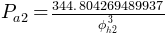

In [9]:
T_a2 = T_inf #Proceso Isotermo :)
#fl = P_a2/(R_a*T_a2)*np.pi/6*phi_h2**3 - (m_h + m_g)*grav
#fl.evalf()
eq4 = Eq(P_a2, (m_h+m_g)*R_a*T_a2/(np.pi/6*phi_h2**3))
eq4

In [10]:
ex1 = (P_inf + m_e*grav/A_c)*np.pi/6*phi_h2**3 - (m_h+m_g)*R_a*T_inf
ex1

In [11]:
ex2 = (P_inf + m_e*grav/A_c + K*(phi_h2 - phi_h0)*np.pi/6*phi_h2**3 - m_h*R_h*T_inf)
ex2

#### Iterando para resolver $m_e$

In [12]:
c1 = m_h*R_h*T_inf
e1 = (P_inf + m_e*grav/A_c + K*(phi_h2-phi_h0)*np.pi/6*phi_h2**3) - c1
print(e1)

311.943688460115*m_e + phi_h2**3*(104711.143297693*phi_h2 - 5235.55716488463) + 99787.9454023726


In [13]:
m_e = 32.8675
diam = ((m_h+m_g)*R_a*T_inf/np.pi*6/(P_inf + m_e*grav/A_c))**(1/3)

#e2 = (P_inf + m_e*grav/A_c)*np.pi/6*phi_h2**3 - c2
P_h2 = P_inf + m_e*grav/A_c + K*(diam-phi_h0)
print(P_h2,A_c)

diam

129498.87691968266 0.031415926535897934


In [15]:
((c1/(np.pi/6*diam**3)) - P_h2)/P_h2

In [ ]:
residual = 0
m_2 = 5
while residual>1e-6:
    m_e = m_e + 0.2